## Generating code
In this notebook we will produce some image processing Python code and execute it to see if it works. We will build up the query gradually to demonstrate that short concise high quality code depends on the details we present in the prompt.

In [1]:
import openai

def prompt(message:str, model="gpt-3.5-turbo"):
    """A prompt helper function that sends a message to openAI
    and returns only the text response.
    """
    client = openai.OpenAI()
    response = client.chat.completions.create(
        model=model,
        messages=[{"role": "user", "content": message}]
    )
    return response.choices[0].message.content

In [2]:
query1 = """
Write python code to open the image file '../../data/blobs.tif' 
and threshold it using Otsu's method.
Apply connected component labeling to the result to retrieve a label image.
Visualize the label image.
"""

code = prompt(query1)
print(code)

Here is an example code that opens the image file, applies Otsu's thresholding method, performs connected component labeling, and visualizes the label image using the Matplotlib library:

```python
import numpy as np
import cv2
from matplotlib import pyplot as plt

# Open the image file
image_file = '../../data/blobs.tif'
image = cv2.imread(image_file, cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
_, threshold = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Perform connected component labeling
_, labels = cv2.connectedComponents(threshold)

# Visualize the label image
plt.imshow(labels, cmap='nipy_spectral')
plt.colorbar()
plt.show()
```

Make sure you have the OpenCV and Matplotlib libraries installed in your Python environment before running this code.


In [3]:
query2 = query1 + """
Do not explain the solution. 
Only write Python code and short comments are ok.
"""
code = prompt(query2)
print(code)

```python
import cv2
import numpy as np

# Read the image
image = cv2.imread('../../data/blobs.tif', cv2.IMREAD_GRAYSCALE)

# Apply Otsu's thresholding
_, thresholded = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Apply connected component labeling
num_labels, labels = cv2.connectedComponents(thresholded)

# Convert label image to RGB for visualization
label_image_color = cv2.cvtColor(labels.astype(np.uint8), cv2.COLOR_GRAY2BGR)

# Visualize the label image
cv2.imshow('Label Image', label_image_color)
cv2.waitKey(0)
cv2.destroyAllWindows()
```


In [4]:
query3 = query2 + """
Assume the code is executed in a Jupyter notebook.

Do not use any of these Python libraries:
* OpenCV
* PIL
* Pillow
"""
code = prompt(query3)
print(code)

import numpy as np
from skimage import io, filters, measure
import matplotlib.pyplot as plt

# Load the image
image = io.imread('../../data/blobs.tif')

# Apply Otsu's method for thresholding
thresh = filters.threshold_otsu(image)
binary_image = image > thresh

# Apply connected component labeling
label_image = measure.label(binary_image)

# Visualize the label image
plt.imshow(label_image, cmap='jet')
plt.colorbar()
plt.show()


For completeness, we just print out the entiry query once again.

In [5]:
print(query3)


Write python code to open the image file '../../data/blobs.tif' 
and threshold it using Otsu's method.
Apply connected component labeling to the result to retrieve a label image.
Visualize the label image.

Do not explain the solution. 
Only write Python code and short comments are ok.

Assume the code is executed in a Jupyter notebook.

Do not use any of these Python libraries:
* OpenCV
* PIL
* Pillow



Next, we execute the code.

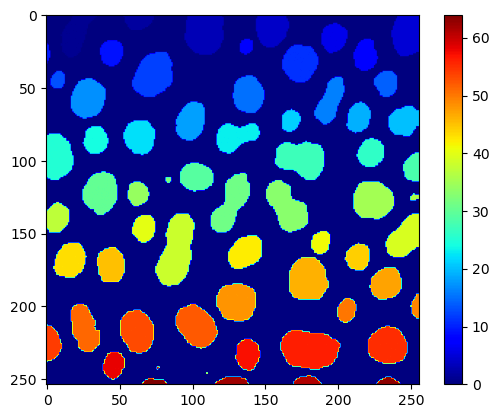

In [6]:
clean_code = code.replace('```python','').replace('```','')

exec(clean_code)